In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('uber.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [9]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
df.describe()

Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000  
mean          -72.525292         39.923890         1.684535  
std            13.117408          6.794829         1.385997  
min         -3356.666300       -881.985513         0.000000  
25%           -73.991407         40.733823         1.000000  
50%           -73.980093         40.753042         1.000000  
75%           -73.963658         40.768001         2.000000  
max          1153.572603        872.697628       208.000000

In [11]:
df.tail()

Unnamed: 0                           key  fare_amount  \
199995    42598914  2012-10-28 10:49:00.00000053          3.0   
199996    16382965   2014-03-14 01:09:00.0000008          7.5   
199997    27804658  2009-06-29 00:42:00.00000078         30.9   
199998    20259894   2015-05-20 14:56:25.0000004         14.5   
199999    11951496  2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1

In [12]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [18]:
df.dropna(inplace=True)
#df = df.dropna()
#df['column_name'] = df['column_name'].fillna("N")
#df['column_name'] = df['column_name'].fillna(df['column_name'].mean())

In [19]:
df.isnull().sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

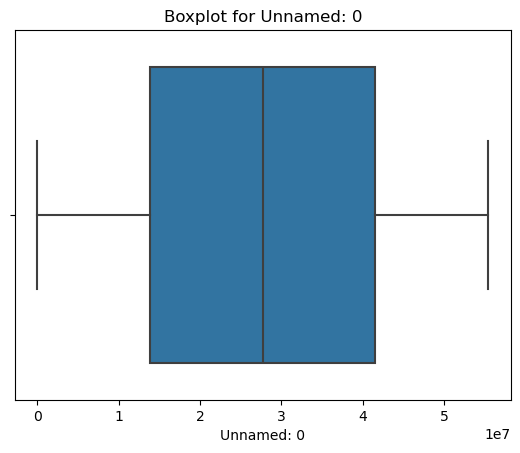

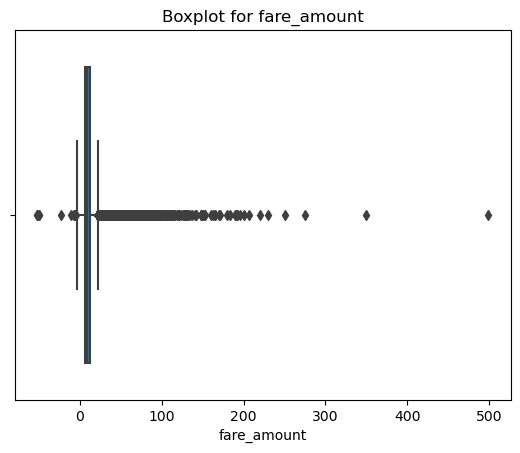

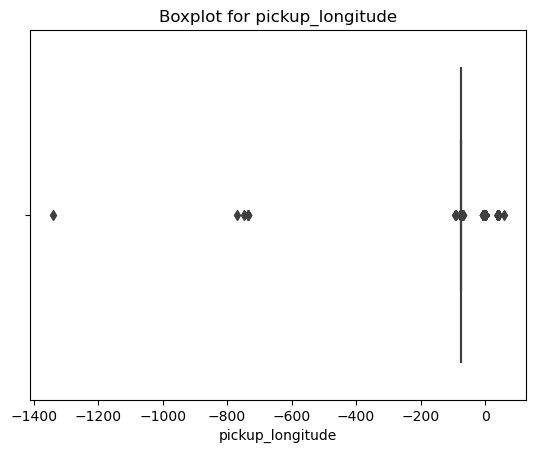

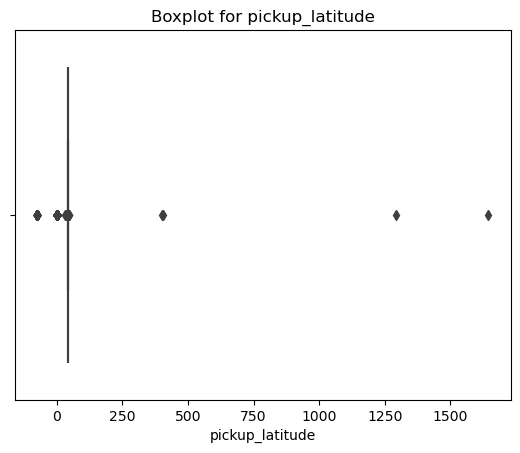

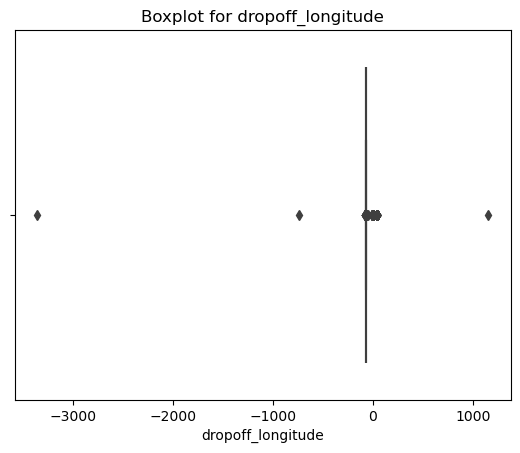

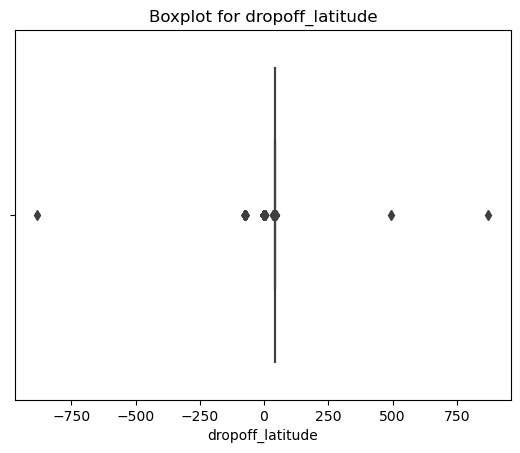

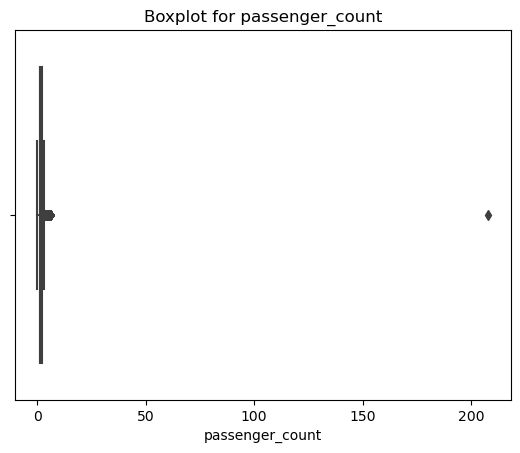

In [22]:
#identify outliers
for i in df.columns:
    # Check if the column is numerical
    if df[i].dtype in ['float64', 'int64']:
        sns.boxplot(x=df[i])
        plt.title(f'Boxplot for {i}')
        plt.show()

In [35]:
from scipy.stats import zscore

# Calculate Z-scores
df['z_score'] = zscore(df['fare_amount'])

# Remove rows with Z-score > 3 or < -3
df_no_outliers = df[(df['z_score'] < 3) & (df['z_score'] > -3)]

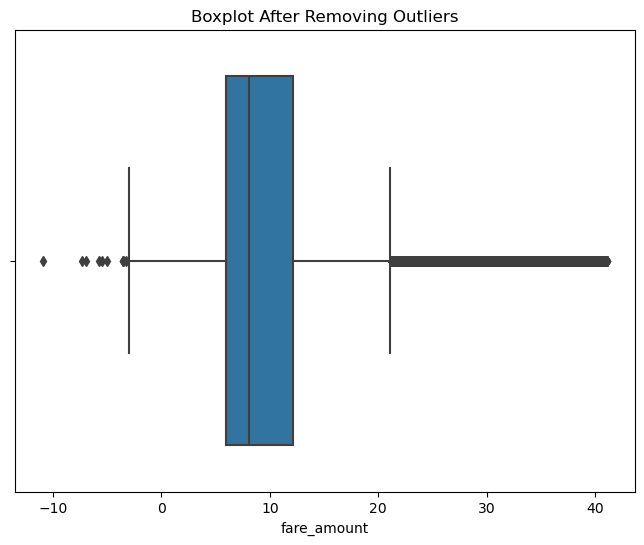

In [36]:
# Plot boxplot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['fare_amount'])
plt.title('Boxplot After Removing Outliers')
plt.show()
# Boxplot to visualize outliers for a specific column



In [23]:
# Drop a column 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

C:\Users\aarti\AppData\Local\Temp\ipykernel_19712\2196634558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['z_score'] = zscore(df_filtered['fare_amount'])


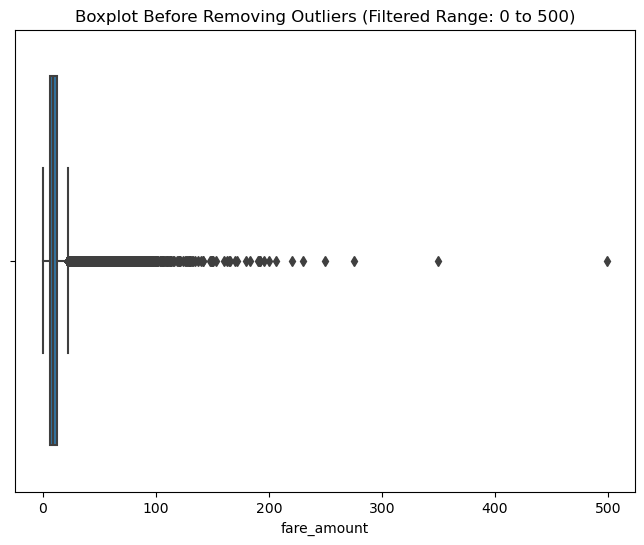

In [33]:
# Filter the data to include only fare_amount values between 0 and 500
df_filtered = df[(df['fare_amount'] >= 0) & (df['fare_amount'] <= 500)]
# Calculate Z-scores for the filtered fare_amount column
df_filtered['z_score'] = zscore(df_filtered['fare_amount'])

# Remove rows where Z-score is > 3 or < -3
df_no_outliers = df_filtered[(df_filtered['z_score'] < 3) & (df_filtered['z_score'] > -3)]

# Plot the boxplot for original filtered data (before removing outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['fare_amount'])
plt.title('Boxplot Before Removing Outliers (Filtered Range: 0 to 500)')
plt.show()

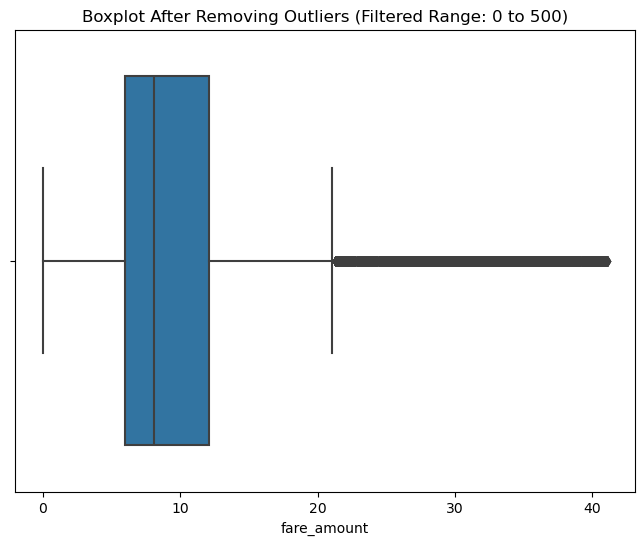

In [34]:
# Plot the boxplot for data after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['fare_amount'])
plt.title('Boxplot After Removing Outliers (Filtered Range: 0 to 500)')
plt.show()


In [39]:
#cheak correlation


# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
# Calculate Pearson correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.010458        -0.008482   
pickup_longitude      0.010458          1.000000        -0.816461   
pickup_latitude      -0.008482         -0.816461         1.000000   
dropoff_longitude     0.008986          0.833026        -0.774787   
dropoff_latitude     -0.011014         -0.846324         0.702367   
passenger_count       0.010158         -0.000415        -0.001559   
z_score               1.000000          0.010458        -0.008482   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.008986         -0.011014         0.010158   
pickup_longitude            0.833026         -0.846324        -0.000415   
pickup_latitude            -0.774787          0.702367        -0.001559   
dropoff_longitude           1.000000         -0.917010         0.000033   
dropoff_latitude           -0.917010          1.000000        -0.000659 

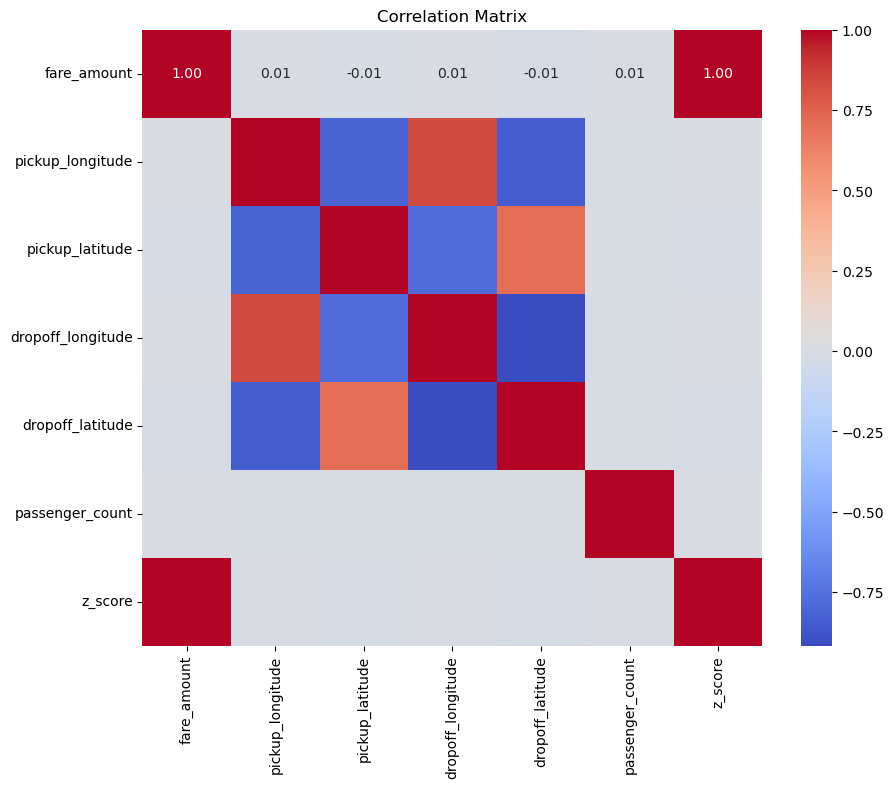

In [40]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

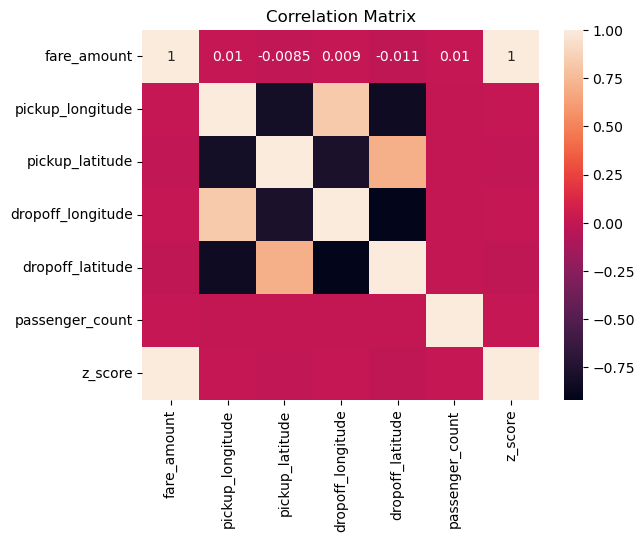

In [45]:
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [49]:
x=df_numeric.drop('fare_amount',axis=1)
y=df_numeric['fare_amount']


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(x)

array([[0.90600001, 0.06677805, 0.72782548, 0.5258549 , 0.00480769,
        0.10798548],
       [0.90600392, 0.06677215, 0.72782654, 0.52587035, 0.00480769,
        0.10834846],
       [0.90599627, 0.06677945, 0.72783367, 0.52588307, 0.00480769,
        0.11778584],
       ...,
       [0.90600988, 0.0667886 , 0.72785664, 0.52583745, 0.00961538,
        0.15045372],
       [0.90600193, 0.06677054, 0.72782909, 0.52583906, 0.00480769,
        0.12068966],
       [0.90601104, 0.06676741, 0.72782858, 0.52588088, 0.00480769,
        0.1199637 ]])

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
y_pred[:5]

array([ 5.5, 11.3,  6.5, 18.1, 11.3])

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 1.7098353373369854e-28
Root Mean Squared Error (RMSE): 1.3076067212036597e-14
R-squared (R²): 1.0


In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf[:5]

array([ 5.5, 11.3,  6.5, 18.1, 11.3])

In [57]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.14875371007833318
Root Mean Squared Error (RMSE): 0.3856860252567277
R-squared (R²): 0.998460771999522


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# And y_test is the actual test data

# For Linear Regression
r2_lr = r2_score(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
mae_lr = mean_absolute_error(y_test, y_pred)

# For Random Forest Regression
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the evaluation metrics for both models
print("Linear Regression Model Evaluation:")
print(f"R²: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print("\n")

print("Random Forest Regression Model Evaluation:")
print(f"R²: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")

Linear Regression Model Evaluation:
R²: 1.0000
RMSE: 0.0000
MAE: 0.0000


Random Forest Regression Model Evaluation:
R²: 0.9985
RMSE: 0.3857
MAE: 0.0028
